In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
logins_df = pd.read_json(r'C:\Users\hxion\Jupyter notebook of Springboard\1631809090_1481053515_ultimate_challenge_3_\ultimate_challenge\logins.json')
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


Login time is in 1970? Looks suspicious, I would like to check with stakeholders.

In [3]:
logins_df['login_time'] = pd.to_datetime(logins_df['login_time'])

In [4]:

logins_df['count'] = 1
logins_df.set_index('login_time', inplace=True)
logins_df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [5]:
df_count = logins_df.resample('15T').sum()


In [6]:
df_count.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


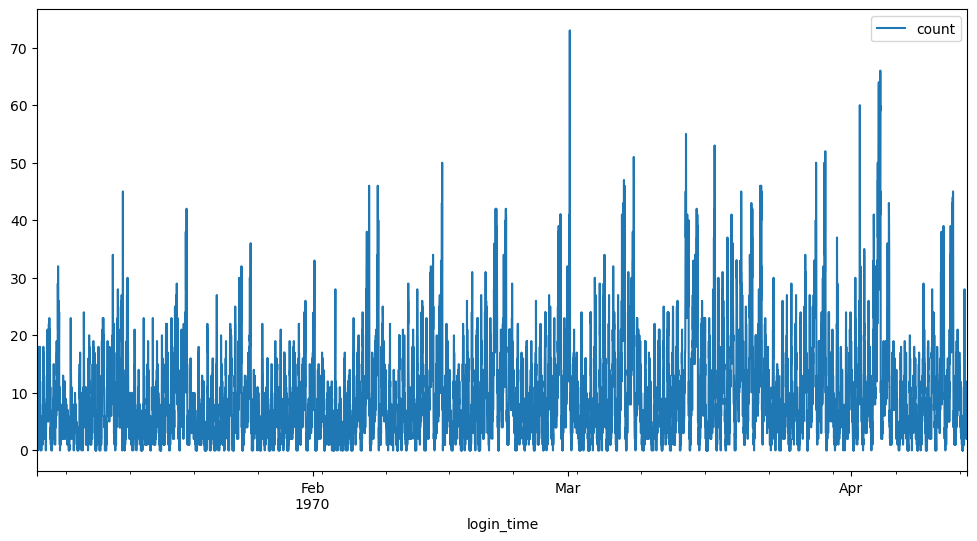

In [7]:
df_count.plot(kind='line',figsize=(12,6));

Faintly, I can observe a periodic pattern in the login_time and a gradually increasing trend. However, the data is too dense, making it difficult to observe with 15-minute intervals. Let's change the aggregation time period to one day.

In [8]:
df_daily = logins_df.resample('D').sum()

In [9]:
df_daily.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


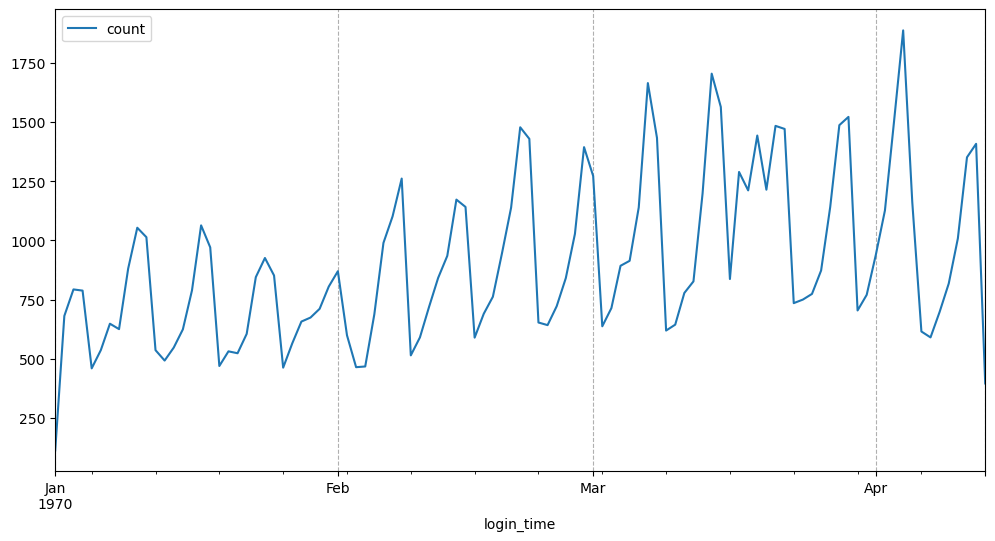

In [10]:
df_daily.plot(kind='line',figsize=(12,6))
plt.grid(True, axis='x', linestyle='dashed')

We can see that starting from February, the data shows an upward trend, and there is a small peak around the beginning of April.